In [1]:
import pandas as pd

In [2]:
#Carga de datos
df = pd.read_csv('defweb23.csv',  sep=';')

In [3]:
# Filtrar solo defunciones con causa X70 (suicidio)
suicidio_df = df[df["CAUSA"] == "X70"]

# Ver provincias (valores únicos de la columna PROVRES)
provincias_neumonia = suicidio_df["PROVRES"].unique()

print("Provincias con defunciones por suicidio (X70):")
print(provincias_neumonia)

conteo_provincias = suicidio_df["PROVRES"].value_counts()

print("Número de registros de defunciones por suicidio por provincia:")
print(conteo_provincias)

Provincias con defunciones por suicidio (X70):
[66 94 82 50  6 30 18 14 54 38 62 70 90 58 26 86 22 10 99 78 74 46 42 34
 98  2]
Número de registros de defunciones por suicidio por provincia:
PROVRES
6     32
82    29
14    29
50    27
30    26
90    26
18    24
66    24
38    23
54    23
70    23
34    22
86    21
62    21
10    20
58    20
22    20
46    19
78    17
74    17
42    14
94    11
26     9
99     6
2      3
98     2
Name: count, dtype: int64


In [5]:
# Filtrar suicidios
suicidio_df = df[df["CAUSA"] == "X70"]
conteo_provincias = suicidio_df["PROVRES"].value_counts()

# Población por provincia
poblacion = {
    2: 3075646, 6: 17541141, 10: 367828, 14: 3900000, 18: 1213242, 22: 1143201,
    26: 603120, 30: 1385965, 34: 606041, 38: 797955, 42: 366022, 46: 384607,
    50: 2062846, 54: 1237340, 58: 726590, 62: 762067, 66: 1333365, 70: 818234,
    74: 540905, 78: 337226, 82: 3397532, 86: 1060906, 90: 1694656, 94: 190641,
    98: None, 99: None
}

# Nombres de provincias
codigos_provincias = {
    2: "Ciudad Autónoma de Buenos Aires", 6: "Buenos Aires", 10: "Catamarca",
    14: "Córdoba", 18: "Corrientes", 22: "Chaco", 26: "Chubut", 30: "Entre Ríos",
    34: "Formosa", 38: "Jujuy", 42: "La Pampa", 46: "La Rioja", 50: "Mendoza",
    54: "Misiones", 58: "Neuquén", 62: "Río Negro", 66: "Salta", 70: "San Juan",
    74: "San Luis", 78: "Santa Cruz", 82: "Santa Fe", 86: "Santiago del Estero",
    90: "Tucumán", 94: "Tierra del Fuego", 98: "Sin especificar", 99: "Exterior"
}

# Crear DataFrame
df_resultado = conteo_provincias.rename("suicidios").reset_index()
df_resultado.columns = ["PROVRES", "suicidios"]
df_resultado["provincia"] = df_resultado["PROVRES"].map(codigos_provincias)
df_resultado["poblacion"] = df_resultado["PROVRES"].map(poblacion)
df_resultado["tasa_por_100k"] = (df_resultado["suicidios"] / df_resultado["poblacion"]) * 100000
df_resultado = df_resultado.round({"tasa_por_100k": 2})
df_ordenado = df_resultado.sort_values("tasa_por_100k", ascending=False)

print("Tasa de suicidios por cada 100.000 habitantes por provincia:")
print(df_ordenado[["provincia", "suicidios", "poblacion", "tasa_por_100k"]])

Tasa de suicidios por cada 100.000 habitantes por provincia:
                          provincia  suicidios   poblacion  tasa_por_100k
21                 Tierra del Fuego         11    190641.0           5.77
14                        Catamarca         20    367828.0           5.44
18                       Santa Cruz         17    337226.0           5.04
17                         La Rioja         19    384607.0           4.94
20                         La Pampa         14    366022.0           3.82
11                          Formosa         22    606041.0           3.63
19                         San Luis         17    540905.0           3.14
8                             Jujuy         23    797955.0           2.88
10                         San Juan         23    818234.0           2.81
13                        Río Negro         21    762067.0           2.76
15                          Neuquén         20    726590.0           2.75
12              Santiago del Estero         21   10

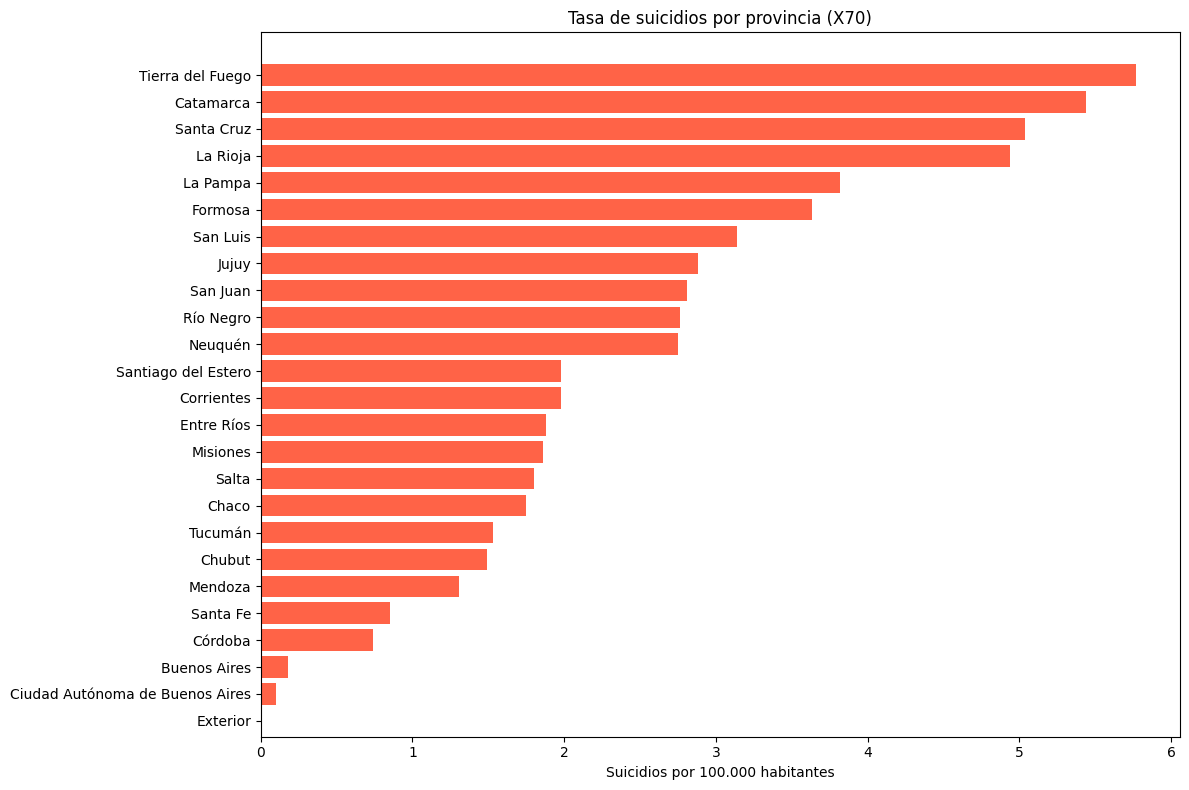

In [6]:
import matplotlib.pyplot as plt

# Este script supone que df_ordenado ya fue creado
plt.figure(figsize=(12, 8))
plt.barh(df_ordenado["provincia"], df_ordenado["tasa_por_100k"], color="tomato")
plt.xlabel("Suicidios por 100.000 habitantes")
plt.title("Tasa de suicidios por provincia (X70)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()